###**Libraries Imported**

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

###**Data Describiton**

In [ ]:
# Open and print data describtion file to understand data.
with open('/content/data_description.txt', 'r') as file:
    data_describtion = file.read()
print(data_describtion)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

###**Data Acquisisiton**

In [ ]:
#upload the training data.
house_df = pd.read_csv('/content/train.csv')

###**Data Exploration**

In [ ]:
#Check head of data
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Understand the shape of training data.
house_df.shape

(1460, 81)

In [ ]:
# check for duplicates
house_df.duplicated().sum()

0

In [ ]:
# Drop Id column
house_df.drop(['Id'], axis = 1, inplace = True)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# house training data info.
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
# Describe the training data.
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [ ]:
# describe target column 'SalePrice'.
house_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Distribution of SalePrice')

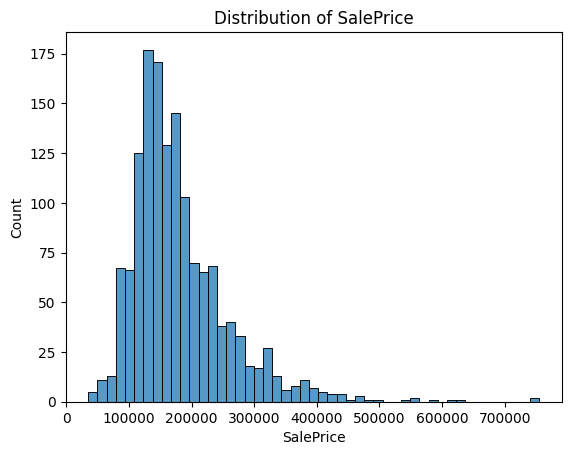

In [ ]:
# Distribution of target column 'SalePrice'.
sns.histplot(house_df['SalePrice'])
plt.title("Distribution of SalePrice")

In [ ]:
# Check variance of SalePrice
house_df['SalePrice'].var()

6311111264.297448

In [ ]:
# Separate numerical and categorical features.
numerical_house_df = house_df.select_dtypes(include=['int64', 'float64'])
categorical_house_df = house_df.select_dtypes(exclude=['int64','float64'])

In [ ]:
numerical_house_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
categorical_house_df.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


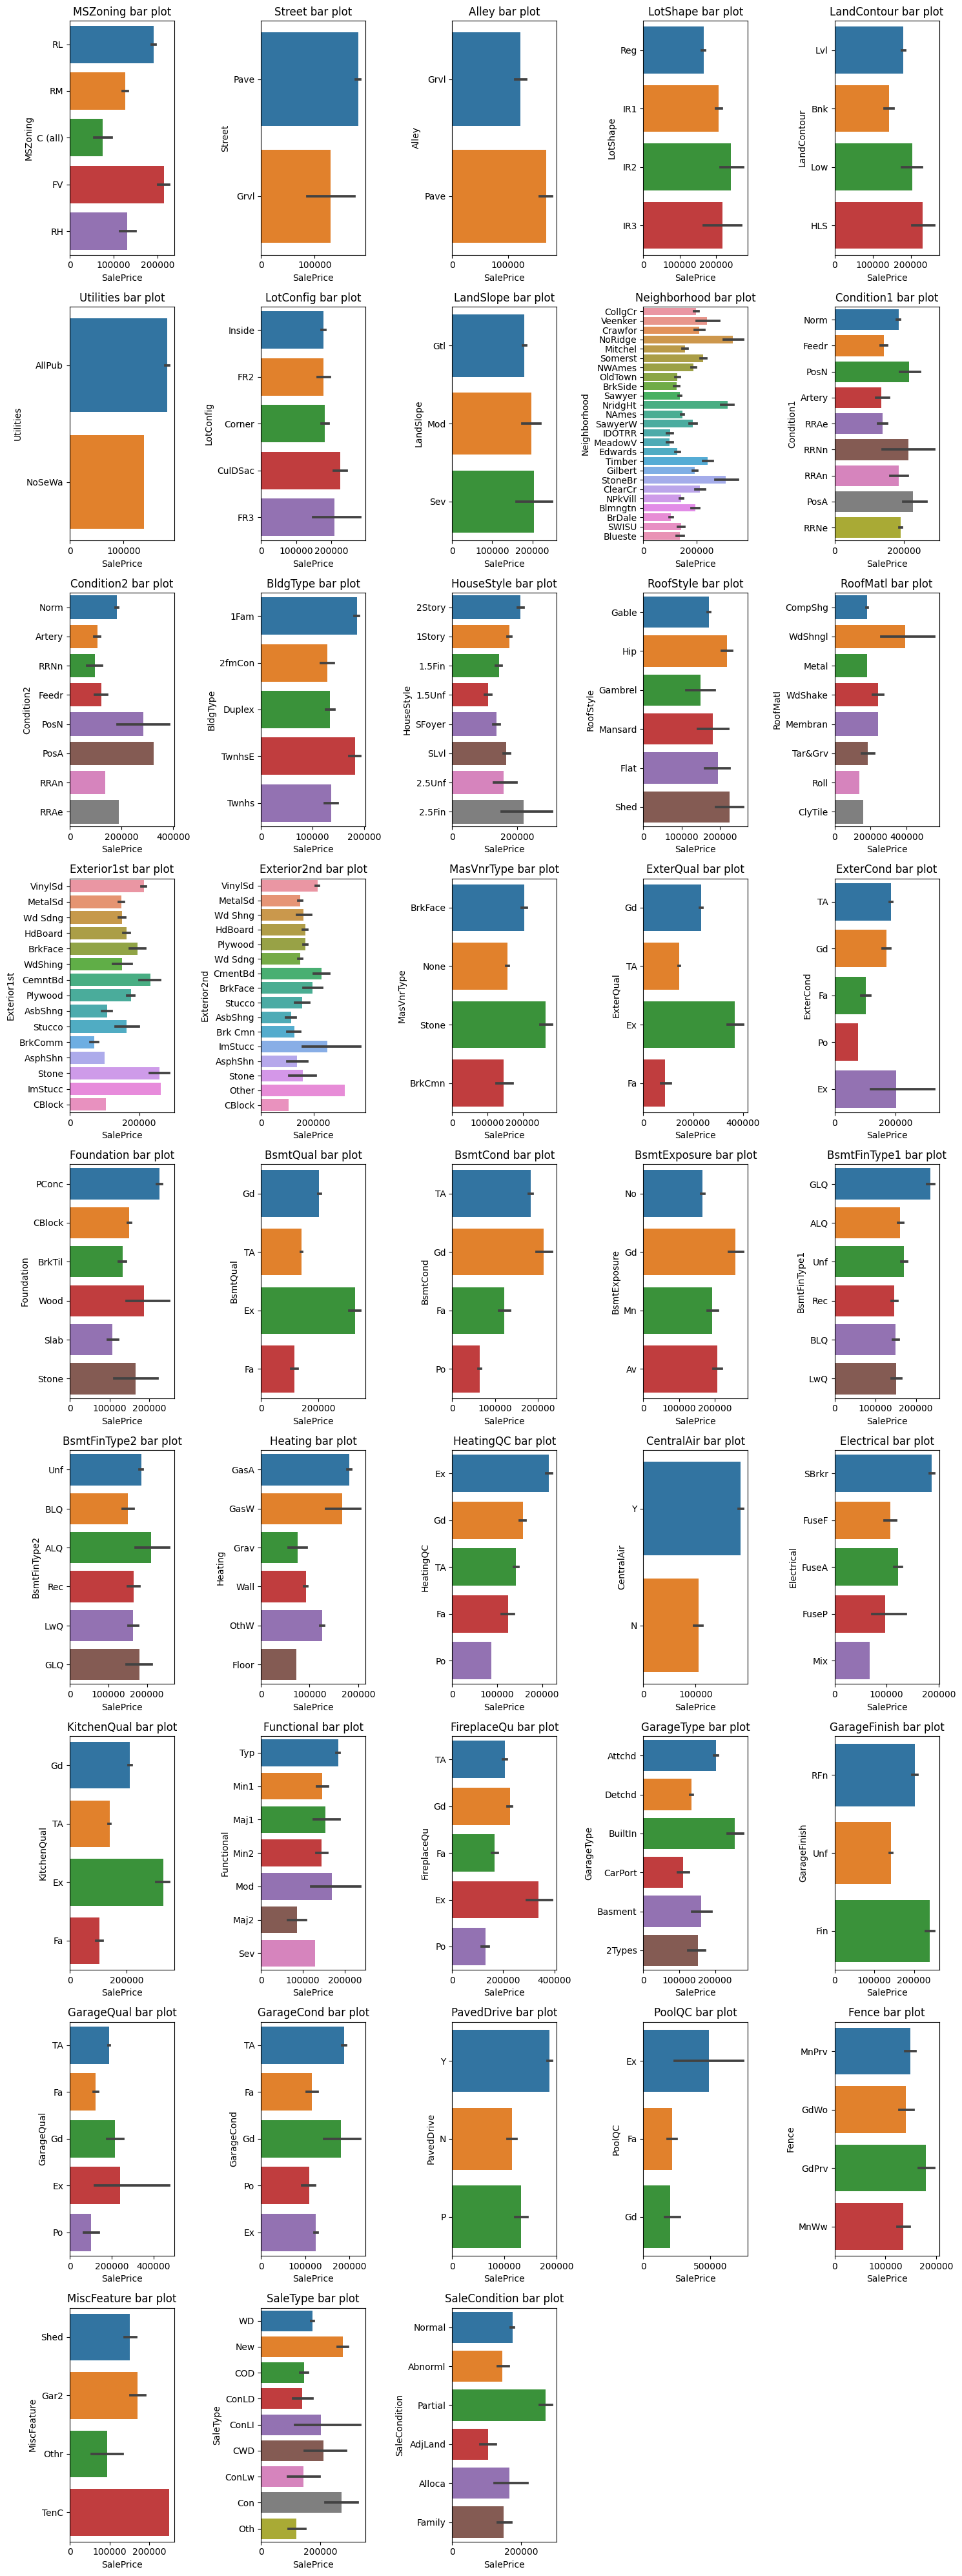

In [ ]:
# Bar plot for exploring categorical features
cat_features = len(categorical_house_df.columns)
# Calculate the figure size
fig, axes = plt.subplots(nrows= 9, ncols= 5, figsize=(15, 40))
# Flatten the axes array to simplify indexing
axes = axes.flatten()
# Iterate over categorical features and create individual bar plot in subplots
for i, column in enumerate(categorical_house_df.columns):
    if i < cat_features:
        sns.barplot(x=house_df['SalePrice'],y=column ,data= categorical_house_df,orient = 'h',ax=axes[i])
        axes[i].set_title(f'{column} bar plot')
# Minimize to only 43 plot not 45
for i in range(len(categorical_house_df.columns), len(axes)):
    fig.delaxes(axes[i])
#prevent overlapping title.
plt.tight_layout()
plt.show()

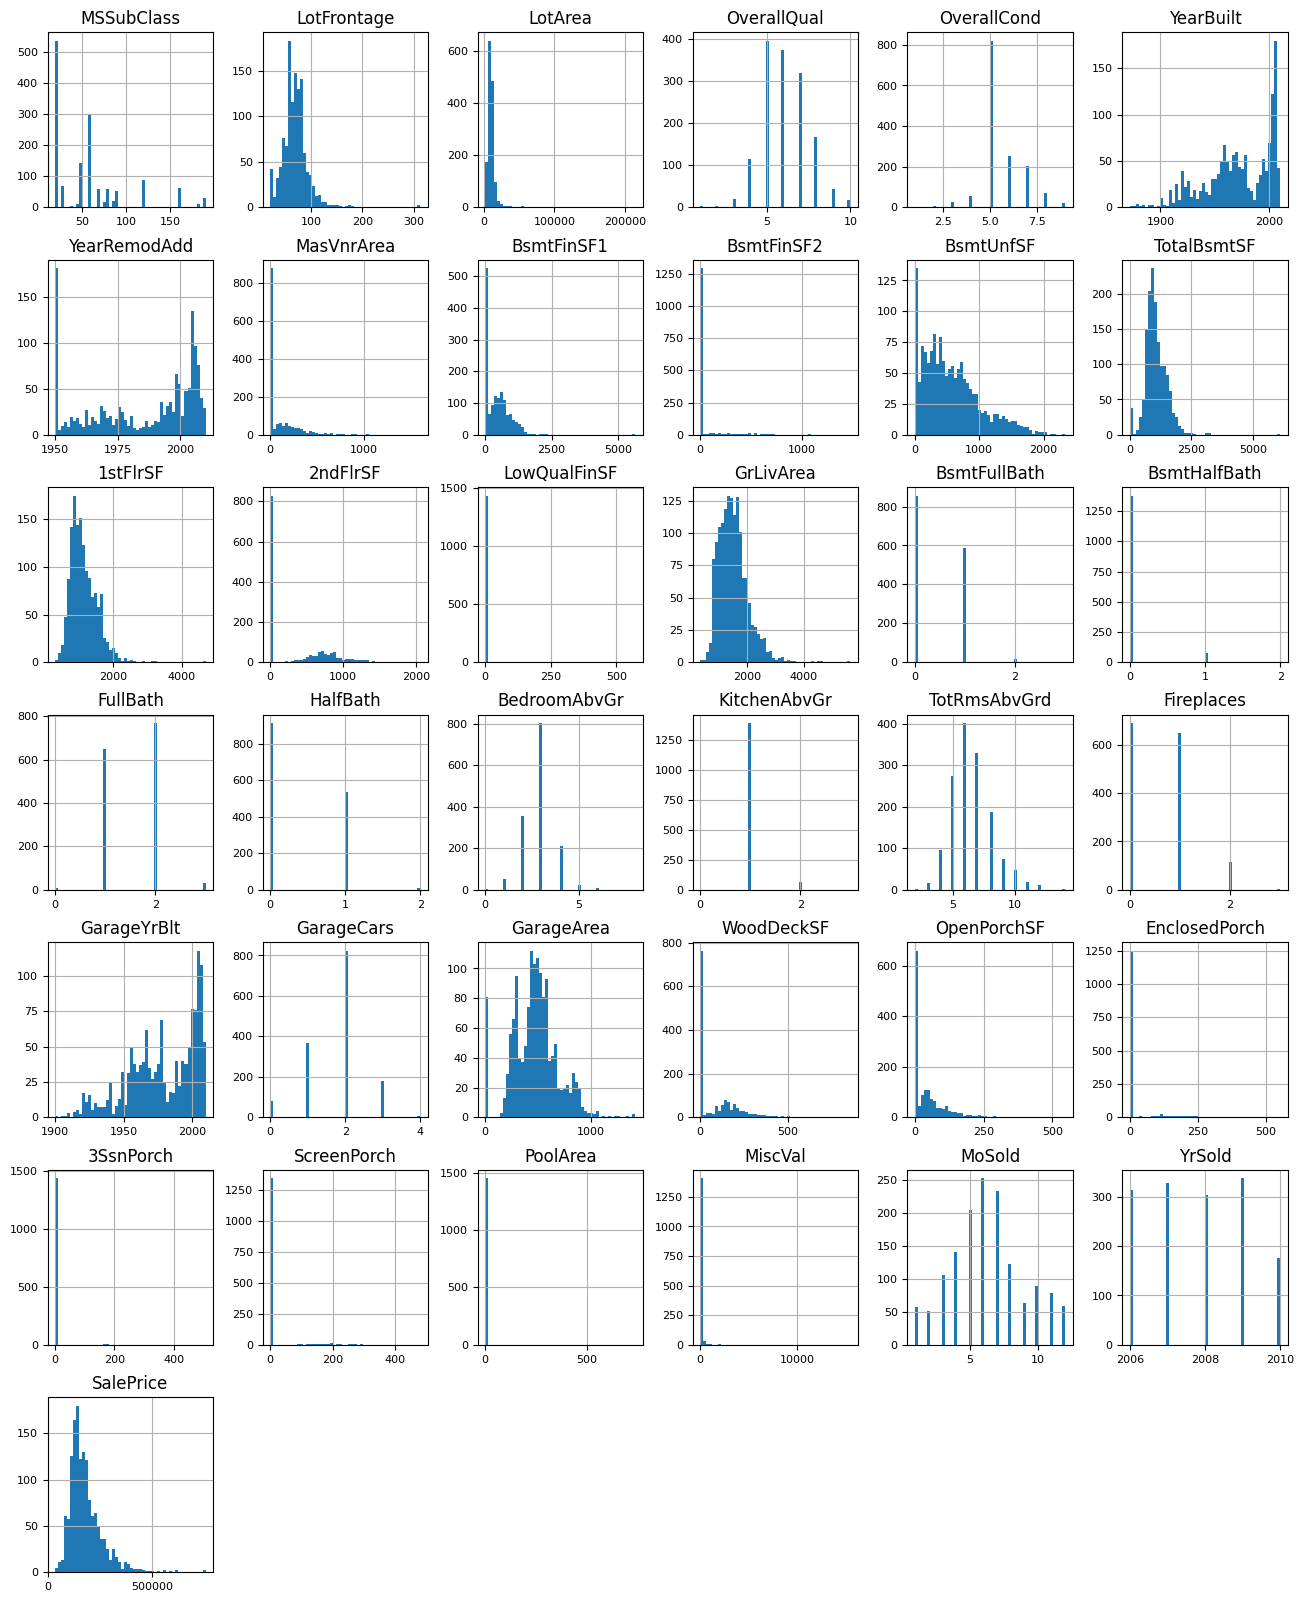

In [ ]:
# Numerical features distribution.
numerical_house_df.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)
plt.title('Distribution of Numerical features')
plt.show()

<Axes: >

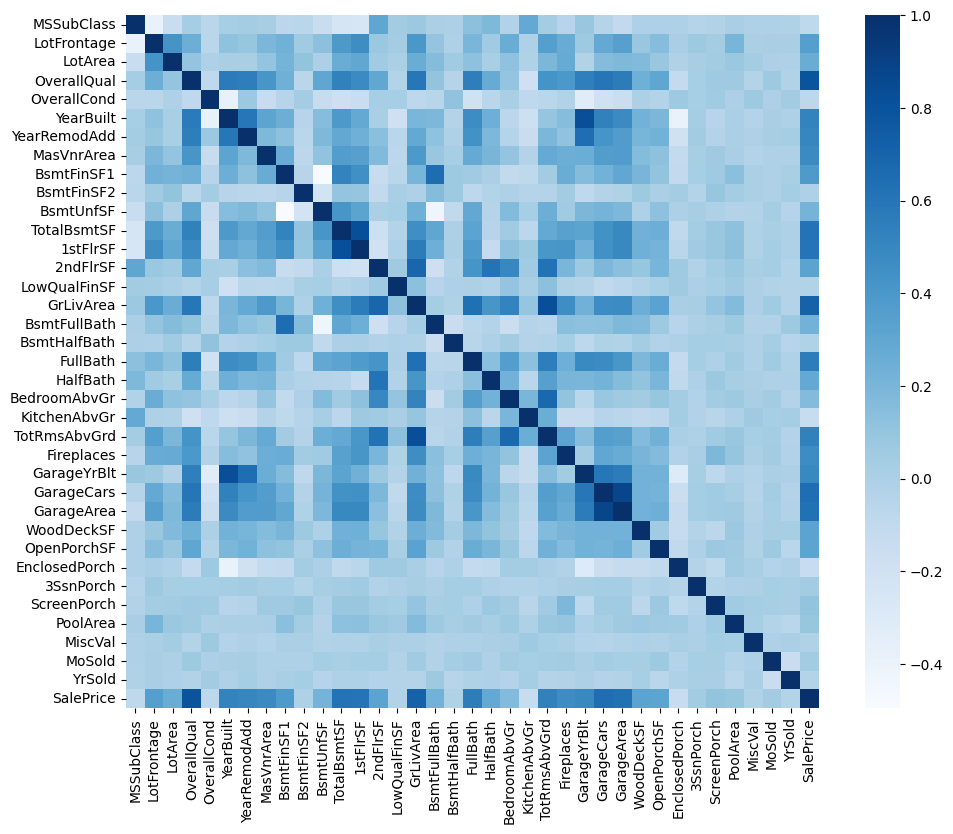

In [ ]:
# Heatmap of numerical features.
corrmat = numerical_house_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,square=True,cmap='Blues')

In [ ]:
corr_matrix = numerical_house_df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

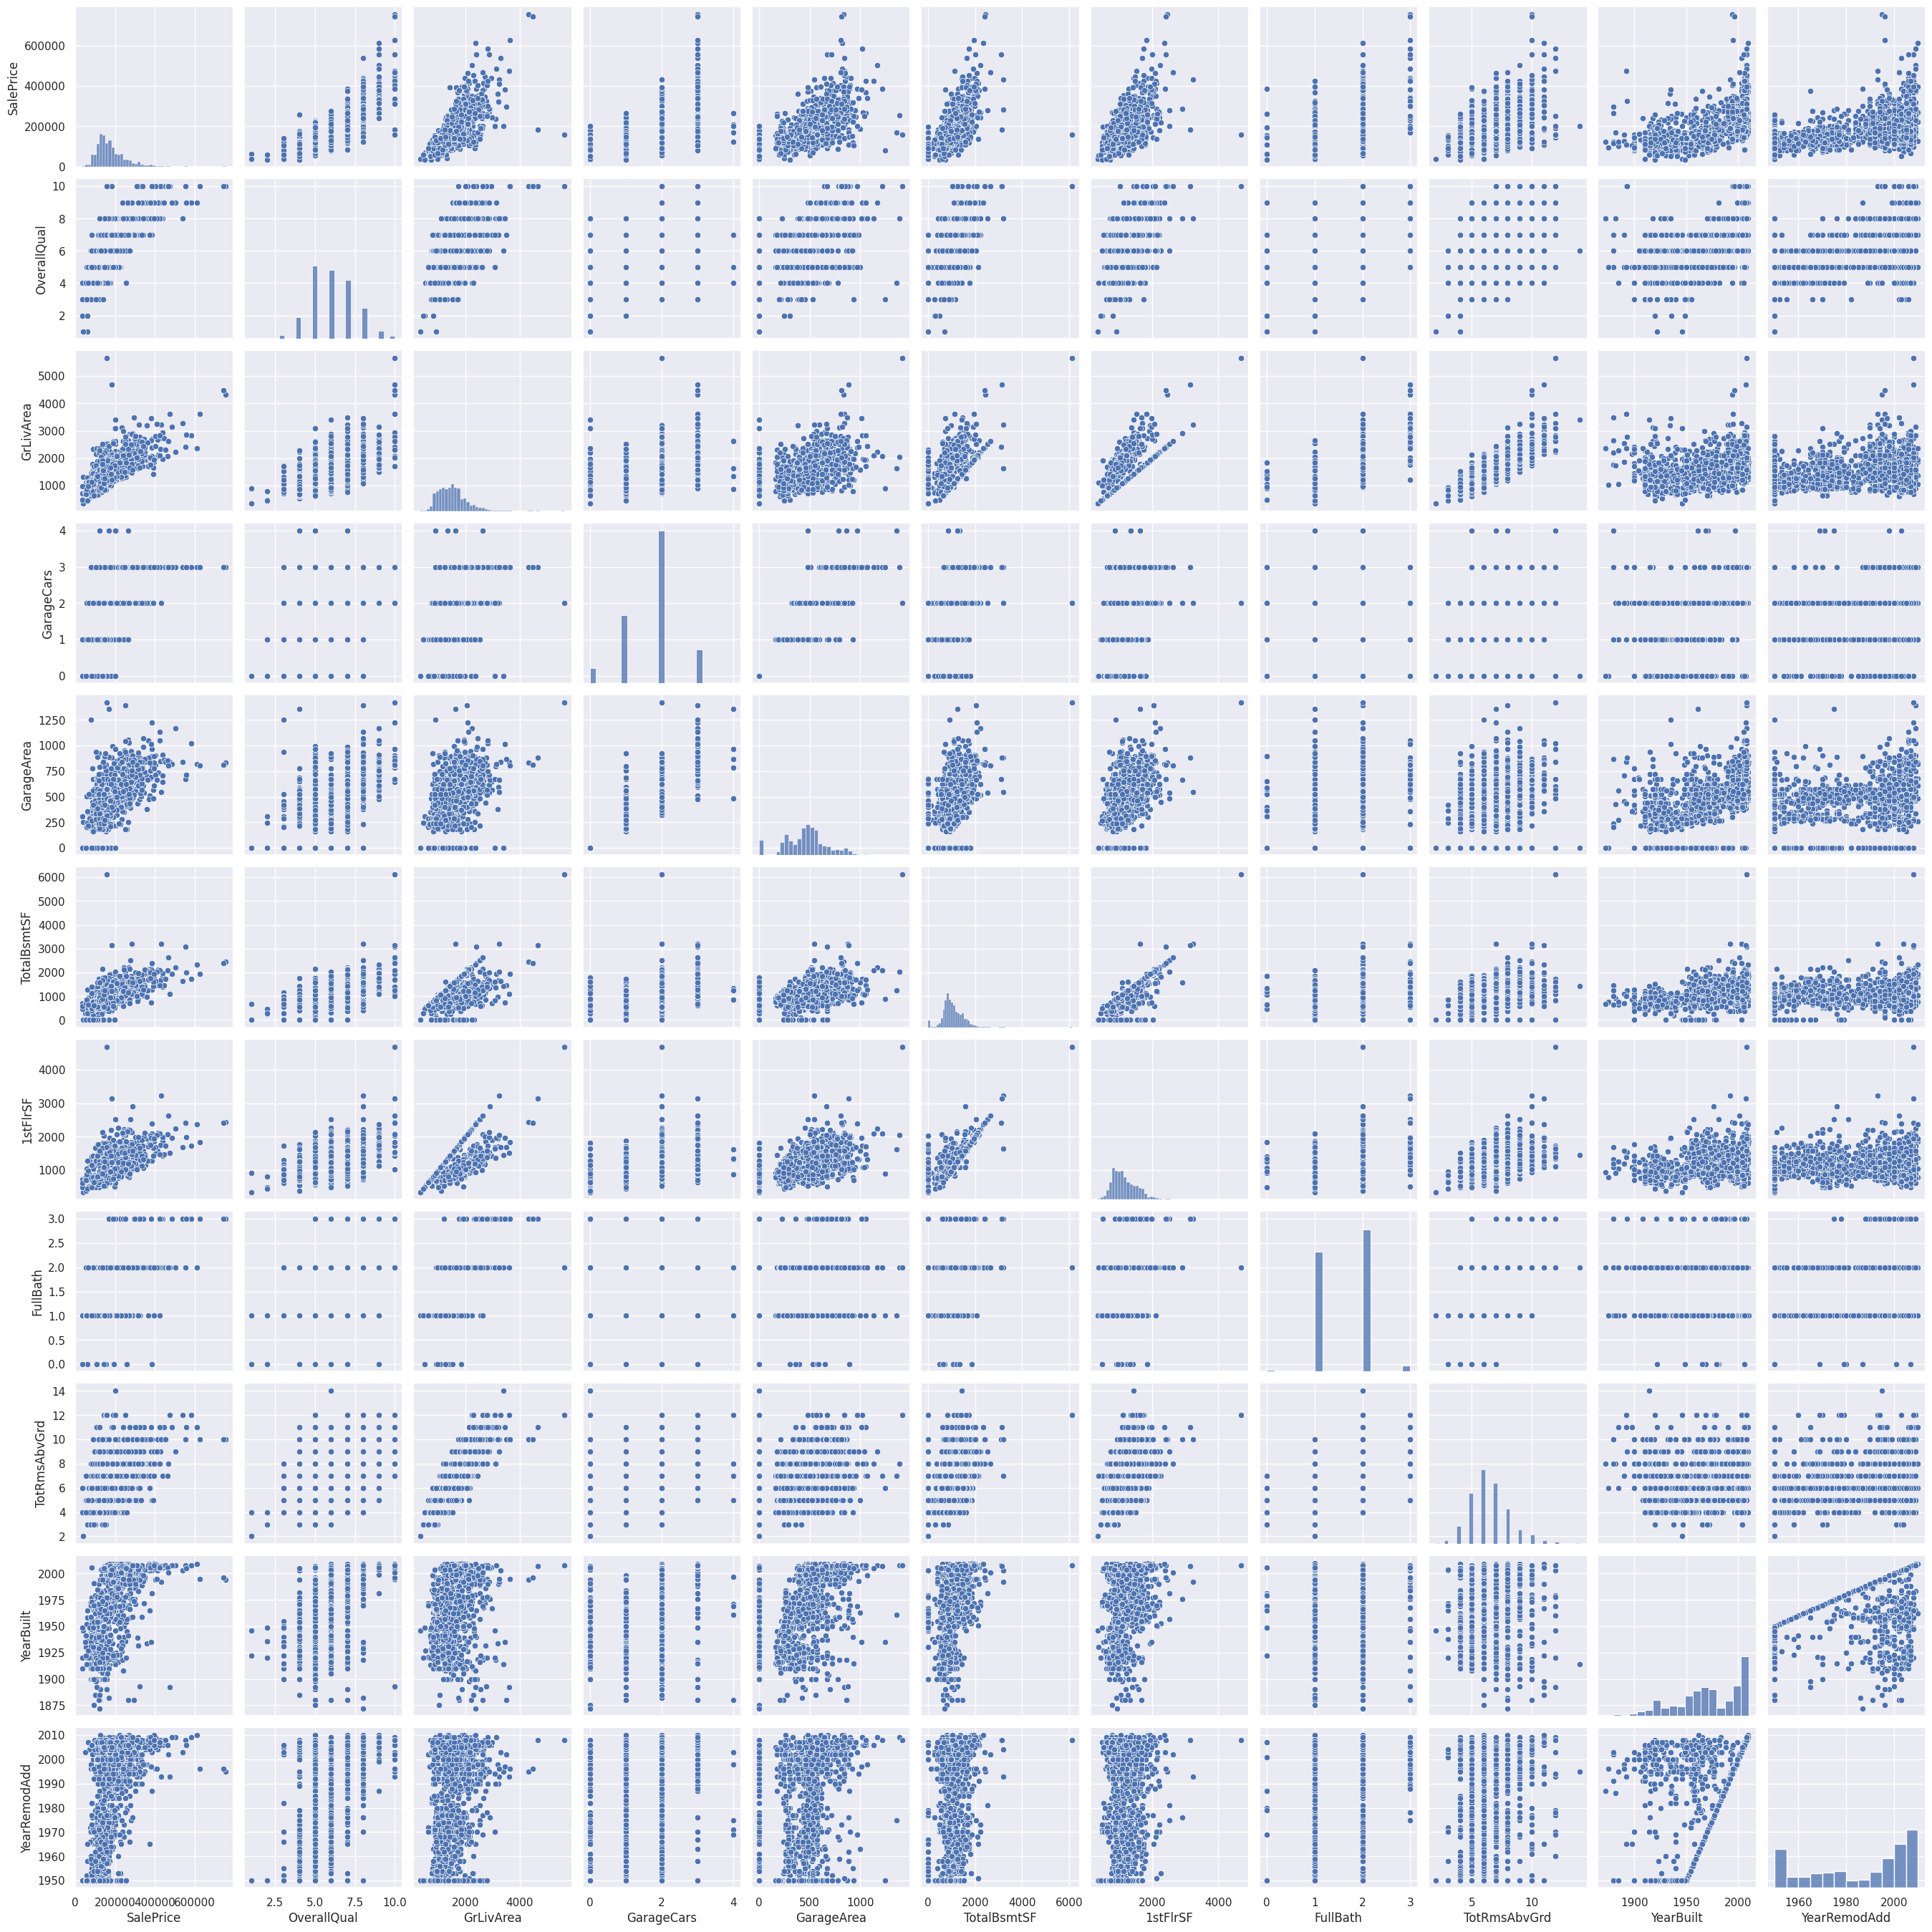

In [ ]:
# Scatter plot for numerical features that have high correlation with target.
sns.set()
numerical_features = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
sns.pairplot(numerical_house_df[numerical_features],height= 2.5)
plt.show()

###**Data Pre-Processing**

#####**Handling Missing Values "Imputation"**

In [ ]:
# Calculate missing data
missing_values = house_df.isnull().sum().sort_values(ascending=False)
missing_percent = (house_df.isnull().sum()/house_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_values, missing_percent], axis=1, keys=['missing_values', 'missing_percent'])
missing_data.head(30)

,missing_values,missing_percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


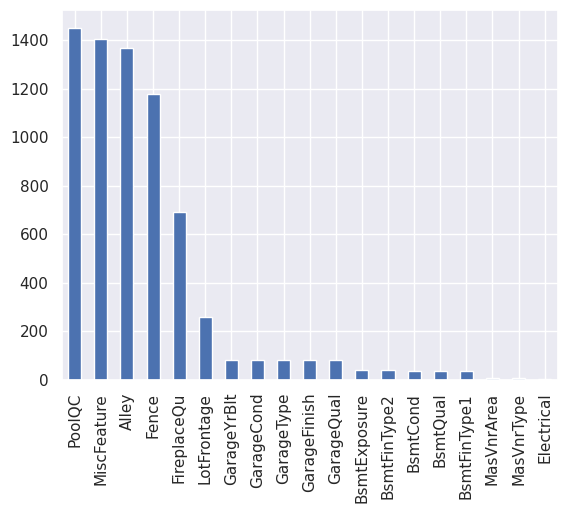

In [ ]:
# bar chart for missing values
missing_values = missing_values[missing_values > 0]
missing_values.plot.bar()
plt.show()

In [ ]:
# data type of missing values in each feature.
house_df.loc[:, missing_values.index].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
FireplaceQu      object
LotFrontage     float64
GarageYrBlt     float64
GarageCond       object
GarageType       object
GarageFinish     object
GarageQual       object
BsmtExposure     object
BsmtFinType2     object
BsmtCond         object
BsmtQual         object
BsmtFinType1     object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

In [ ]:
# Replace missing values in Fire place quality with None.
house_df['FireplaceQu'].fillna('None',inplace = True)# No fireplace
house_df['GarageCond'].fillna('None',inplace = True)# No Garage
house_df['GarageType'].fillna('None',inplace = True) # No Garage
house_df['GarageFinish'].fillna('None',inplace = True)# No Garage
house_df['GarageQual'].fillna('None',inplace = True)# No Garage
house_df['PoolQC'].fillna('None',inplace = True) # No Pool
house_df['MiscFeature'].fillna('None',inplace = True)# No fireplace
house_df['Alley'].fillna('None',inplace = True)# No Alley
house_df['Fence'].fillna('None',inplace = True)# No Fence
house_df['BsmtExposure'].fillna('None',inplace = True)# No Basement
house_df['BsmtFinType2'].fillna('None',inplace = True)# No Basement
house_df['BsmtCond'].fillna('None',inplace = True)# No Basement
house_df['BsmtQual'].fillna('None',inplace = True)# No Basement
house_df['BsmtFinType1'].fillna('None',inplace = True)# No Basement

In [ ]:
# Replace missing values with mode.
house_df['MasVnrType']=house_df['MasVnrType'].fillna(house_df['MasVnrType'].mode()[0])
house_df['Electrical']=house_df['Electrical'].fillna(house_df['Electrical'].mode()[0])

In [ ]:
# Replace missing values from numerical columns.
house_df['LotFrontage']=house_df['LotFrontage'].fillna(house_df['LotFrontage'].median())
house_df['GarageYrBlt']= house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].median())
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].median())

In [ ]:
house_df.isnull().sum().sort_values(ascending = False).head(20)

MSSubClass      0
MSZoning        0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
GarageFinish    0
dtype: int64

#####**Log transofmation**

Text(0.5, 1.0, 'Distribution of SalePrice')

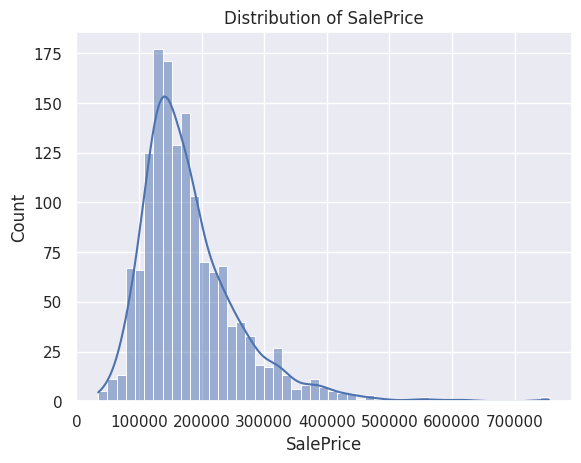

In [ ]:
# Sale Price before log transformation
sns.histplot(house_df['SalePrice'], kde = True)
plt.title("Distribution of SalePrice")

In [ ]:
# Target Log transformation
house_df['SalePrice'] = np.log(house_df['SalePrice'])

In [ ]:
# SalePrice variance after log transformation
house_df['SalePrice'].var()

0.15956179505733453

Text(0.5, 1.0, 'Distribution of SalePrice')

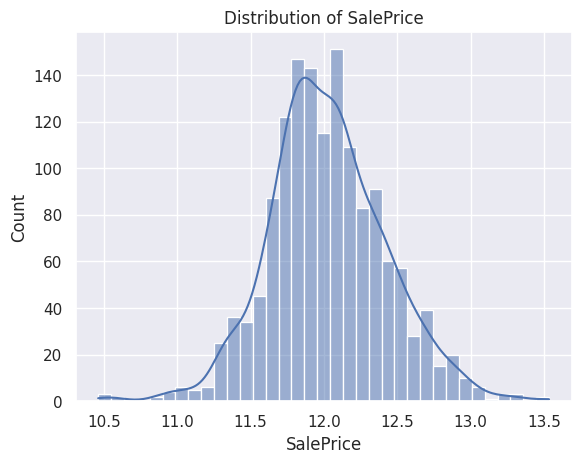

In [ ]:
# SalePrice after transformation
sns.histplot(house_df['SalePrice'], kde = True)
plt.title("Distribution of SalePrice")

##### **Handling Outliers**

In [ ]:
#numerica columns
numerical_house_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

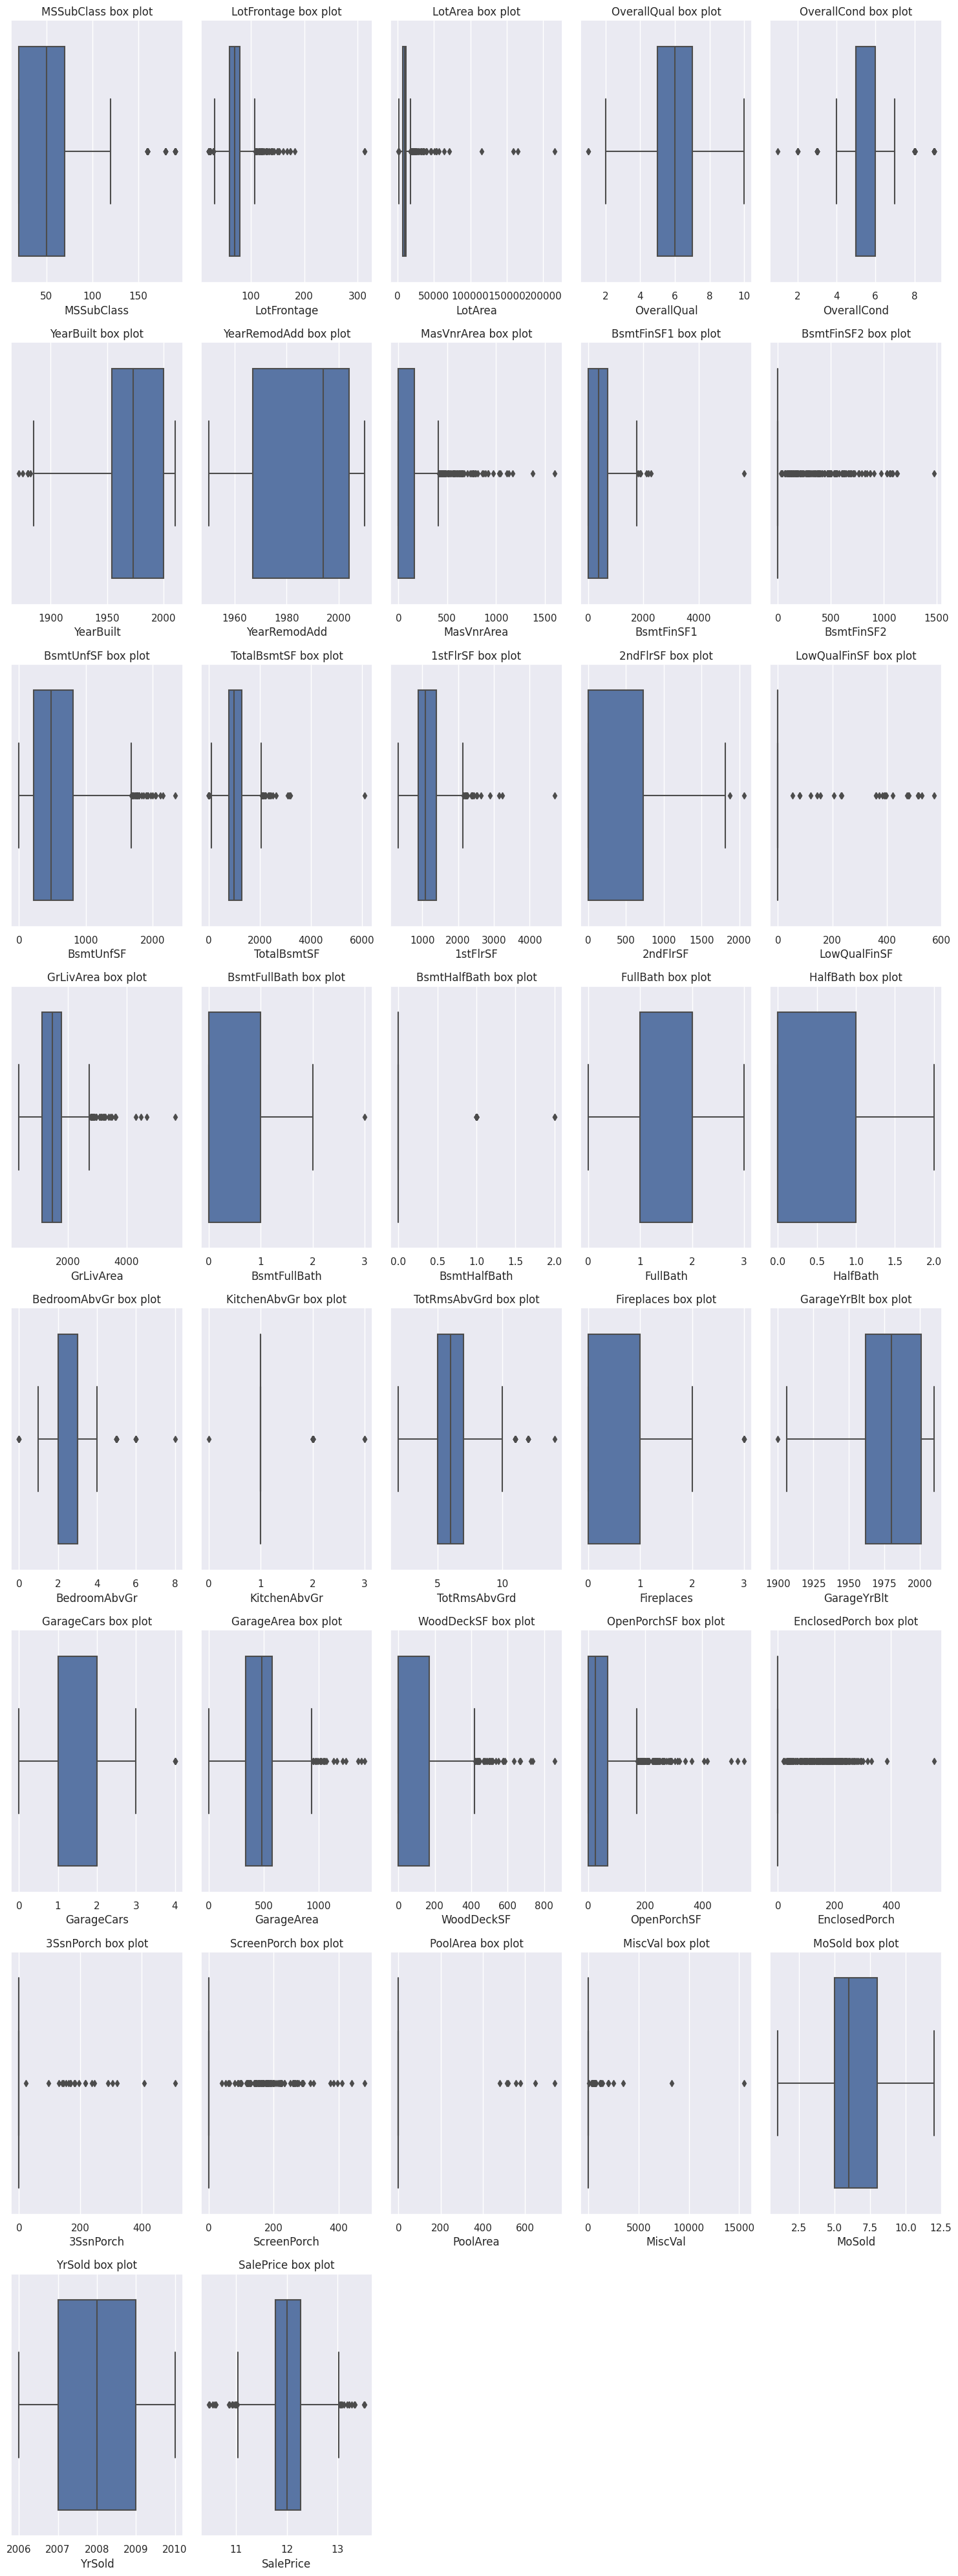

In [ ]:
# boxplot for numerical features before deleting outliers
num_features = len(numerical_house_df.columns)
# Calculate the figure size
fig, axes = plt.subplots(nrows= 8, ncols= 5, figsize=(15, 40))
# Flatten the axes array to simplify indexing
axes = axes.flatten()
# Iterate over numerical features and create individual box plots in subplots
for i, column in enumerate(numerical_house_df.columns):
    if i < num_features:
        sns.boxplot(x=house_df[column], ax=axes[i])
        axes[i].set_title(f'{column} box plot')
# Minimize to only 37 plot
for i in range(len(numerical_house_df.columns), len(axes)):
    fig.delaxes(axes[i])
#prevent overlapping title.
plt.tight_layout()

plt.show()

In [ ]:
# Create function to calculate upper and lower whisker for each numerical feature.
def capping(df, cols, factor):
    for col in cols:
        Q1 = df[col].quantile(0.25) # Calculate first quartile
        Q3 = df[col].quantile(0.75) # calculate second quartile
        IQR = Q3 - Q1 # Interquartile
        upper = Q3 + (factor*IQR) # upper_whisker
        lower = Q1 - (factor*IQR) # lower_whisker
        df[col] = np.where(df[col]>upper, upper,np.where(df[col]<lower, lower, df[col])) # change outliers

In [ ]:
# Handle outliers with capping method.
capping(house_df,house_df.select_dtypes(include=['int64', 'float64']), 1.5)

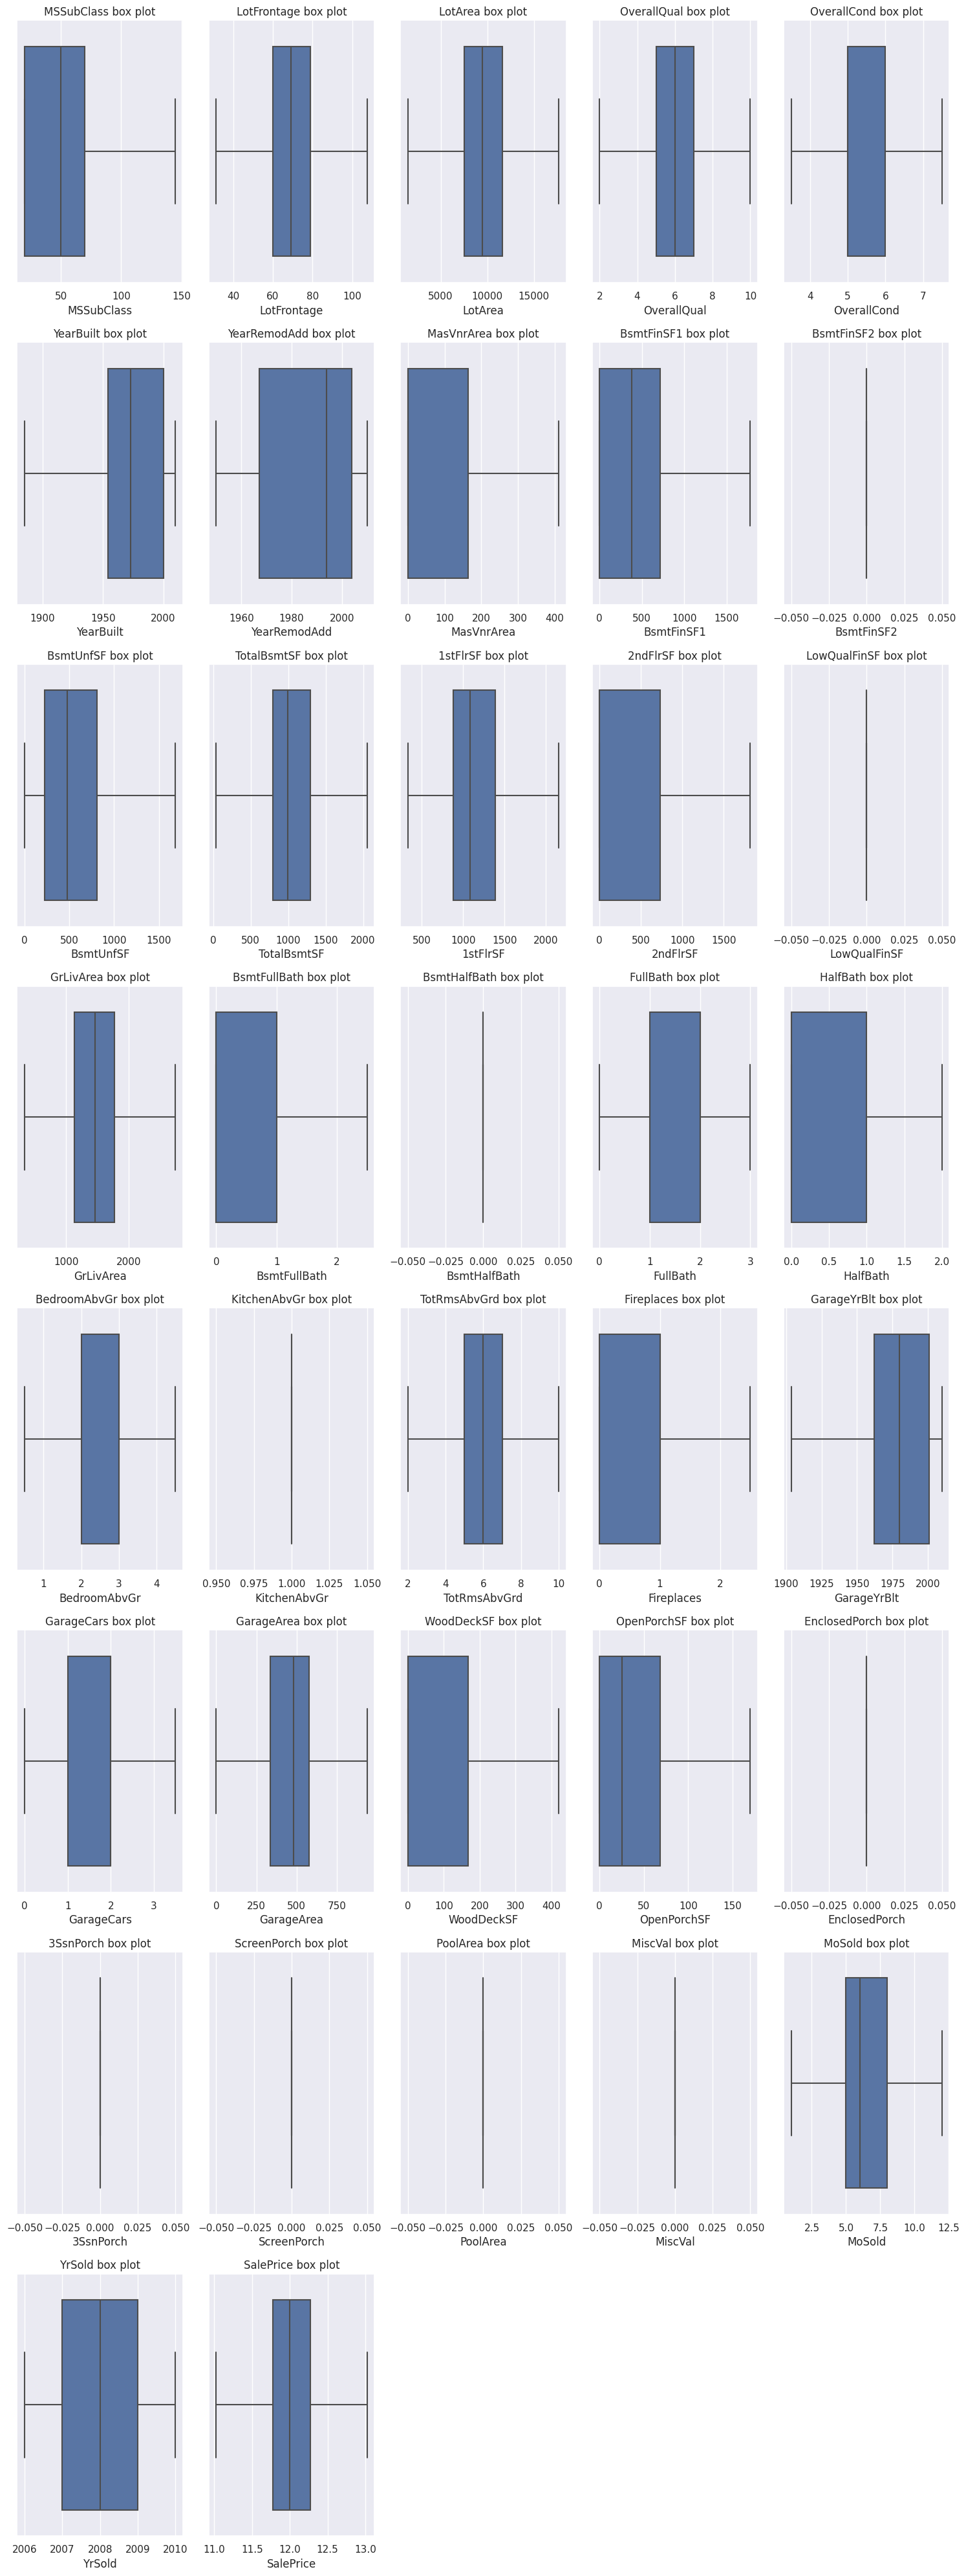

In [ ]:
# boxplot after deleting outliers
num_features = len(numerical_house_df.columns)
# figure size
fig, axes = plt.subplots(nrows= 8, ncols= 5, figsize=(15, 40))
# Flatten axes to simplify indexing
axes = axes.flatten()
# create individual box plots for each feature in subplots
for i, column in enumerate(numerical_house_df.columns):
    if i < num_features:
        sns.boxplot(x=house_df[column], ax=axes[i])
        axes[i].set_title(f'{column} box plot')
#minimize to only 37 plot
for i in range(len(numerical_house_df.columns), len(axes)):
    fig.delaxes(axes[i])
#prevent overlapping title.
plt.tight_layout()
plt.show()

####**Handling Categorical Features**

In [ ]:
# Categorical columns
categorical_house_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
# Numerical columns
numerical_house_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
# Categorical encoding
label = LabelEncoder()
for col in house_df.columns:
  if house_df[col].dtype == 'object':
    house_df[col] = label.fit_transform(house_df[col])

In [ ]:
house_df.shape

(1460, 80)

In [ ]:
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3,65.0,8450.0,1,1,3,3,0,4,...,0.0,3,4,1,0.0,2.0,2008.0,8,4,12.247694
1,20.0,3,80.0,9600.0,1,1,3,3,0,2,...,0.0,3,4,1,0.0,5.0,2007.0,8,4,12.109011
2,60.0,3,68.0,11250.0,1,1,0,3,0,4,...,0.0,3,4,1,0.0,9.0,2008.0,8,4,12.317167
3,70.0,3,60.0,9550.0,1,1,0,3,0,0,...,0.0,3,4,1,0.0,2.0,2006.0,8,0,11.849398
4,60.0,3,84.0,14260.0,1,1,0,3,0,2,...,0.0,3,4,1,0.0,12.0,2008.0,8,4,12.429216


###**Splitting to train and test**

In [ ]:
X = house_df.drop('SalePrice', axis = 1)
y = house_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20.0,3,70.0,8400.0,1,1,3,3,0,4,...,0.0,0.0,3,4,1,0.0,6.0,2010.0,8,4
1066,60.0,3,59.0,7837.0,1,1,0,3,0,4,...,0.0,0.0,3,4,1,0.0,5.0,2009.0,8,4
638,30.0,3,67.0,8777.0,1,1,3,3,0,4,...,0.0,0.0,3,2,1,0.0,5.0,2008.0,8,4
799,50.0,3,60.0,7200.0,1,1,3,3,0,0,...,0.0,0.0,3,2,1,0.0,6.0,2007.0,8,4
380,50.0,3,50.0,5000.0,1,2,3,3,0,4,...,0.0,0.0,3,4,1,0.0,5.0,2010.0,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20.0,3,78.0,9317.0,1,1,0,3,0,4,...,0.0,0.0,3,4,1,0.0,3.0,2007.0,8,4
1130,50.0,3,65.0,7804.0,1,1,3,3,0,4,...,0.0,0.0,3,2,1,0.0,12.0,2009.0,8,4
1294,20.0,3,60.0,8172.0,1,1,3,3,0,4,...,0.0,0.0,3,4,1,0.0,4.0,2006.0,8,4
860,50.0,3,55.0,7642.0,1,1,3,3,0,0,...,0.0,0.0,3,0,1,0.0,6.0,2007.0,8,4


#####**Scaling the Data**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.933485,-0.054796,0.044442,-0.369609,0.058621,0.047674,0.765535,0.299798,-0.029273,0.630128,...,0.0,0.0,0.066503,0.467615,-0.190299,0.0,-0.133417,1.650065,0.316662,0.201772
1,0.135447,-0.054796,-0.592466,-0.527046,0.058621,0.047674,-1.356644,0.299798,-0.029273,0.630128,...,0.0,0.0,0.066503,0.467615,-0.190299,0.0,-0.508010,0.893677,0.316662,0.201772
2,-0.666252,-0.054796,-0.129260,-0.264185,0.058621,0.047674,0.765535,0.299798,-0.029273,0.630128,...,0.0,0.0,0.066503,-1.343907,-0.190299,0.0,-0.508010,0.137290,0.316662,0.201772
3,-0.131786,-0.054796,-0.534566,-0.705176,0.058621,0.047674,0.765535,0.299798,-0.029273,-1.792884,...,0.0,0.0,0.066503,-1.343907,-0.190299,0.0,-0.133417,-0.619098,0.316662,0.201772
4,-0.131786,-0.054796,-1.113573,-1.320382,0.058621,4.025068,0.765535,0.299798,-0.029273,0.630128,...,0.0,0.0,0.066503,0.467615,-0.190299,0.0,-0.508010,1.650065,0.316662,0.201772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.933485,-0.054796,0.507648,-0.113180,0.058621,0.047674,-1.356644,0.299798,-0.029273,0.630128,...,0.0,0.0,0.066503,0.467615,-0.190299,0.0,-1.257196,-0.619098,0.316662,0.201772
1164,-0.131786,-0.054796,-0.245062,-0.536274,0.058621,0.047674,0.765535,0.299798,-0.029273,0.630128,...,0.0,0.0,0.066503,-1.343907,-0.190299,0.0,2.114141,0.893677,0.316662,0.201772
1165,-0.933485,-0.054796,-0.534566,-0.433367,0.058621,0.047674,0.765535,0.299798,-0.029273,0.630128,...,0.0,0.0,0.066503,0.467615,-0.190299,0.0,-0.882603,-1.375486,0.316662,0.201772
1166,-0.131786,-0.054796,-0.824069,-0.581576,0.058621,0.047674,0.765535,0.299798,-0.029273,-1.792884,...,0.0,0.0,0.066503,-3.155429,-0.190299,0.0,-0.133417,-0.619098,0.316662,0.201772


In [ ]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.933485,-0.054796,0.044442,-0.365694,0.058621,0.047674,0.765535,0.299798,-0.029273,0.630128,...,0.0,0.0,0.066503,-1.343907,-0.190299,0.0,-1.631789,-1.375486,0.316662,0.201772
1,0.135447,-0.054796,1.665663,0.708680,0.058621,0.047674,-1.356644,0.299798,-0.029273,-1.792884,...,0.0,0.0,0.066503,0.467615,-0.190299,0.0,-0.882603,1.650065,0.316662,0.201772
2,-0.666252,1.586277,-0.766169,-0.213011,0.058621,-3.929719,0.765535,0.299798,-0.029273,0.630128,...,0.0,0.0,0.066503,0.467615,-0.190299,0.0,-1.257196,1.650065,0.316662,0.201772
3,-0.131786,1.586277,-1.113573,-1.320382,0.058621,0.047674,0.765535,0.299798,-0.029273,-1.792884,...,0.0,0.0,0.066503,0.467615,-0.190299,0.0,1.364955,-1.375486,0.316662,0.201772
4,-0.933485,-0.054796,1.144556,0.888208,0.058621,0.047674,-1.356644,-2.618233,-0.029273,0.630128,...,0.0,0.0,0.066503,0.467615,-0.190299,0.0,0.990362,0.893677,0.316662,0.201772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,-0.666252,1.586277,-1.113573,-1.061716,0.058621,0.047674,0.765535,-4.077249,-0.029273,0.630128,...,0.0,0.0,0.066503,-1.343907,-0.190299,0.0,-1.257196,-0.619098,0.316662,-1.653892
288,-0.933485,-0.054796,2.215720,1.799832,0.058621,0.047674,-1.356644,-1.159218,-0.029273,0.630128,...,0.0,0.0,0.066503,0.467615,-0.190299,0.0,-0.133417,0.893677,0.316662,0.201772
289,0.135447,-0.054796,-0.360863,-0.425817,0.058621,0.047674,0.765535,0.299798,-0.029273,0.630128,...,0.0,0.0,0.066503,0.467615,-0.190299,0.0,1.364955,0.137290,0.316662,0.201772
290,0.402680,-0.054796,-0.534566,-0.178336,0.058621,0.047674,0.765535,0.299798,-0.029273,0.630128,...,0.0,0.0,0.066503,-1.343907,-0.190299,0.0,1.364955,0.893677,0.316662,0.201772


#####**Modeling and Hyperparameter Tuning**

######**LASSO**

In [ ]:
# create model instance
lasso_model = Lasso(alpha = 0.001, random_state = 10) #create model instance

In [ ]:
# Use RandomizedSearchCV
lasso_parameters = {'alpha': [0.001, 0.01, 0.1,0.000391,0.000491,1, 10, 100, 1000]
                    ,'random_state':[1,5,10,24,42]}
lasso_model_random = RandomizedSearchCV(lasso_model, lasso_parameters, n_iter=10, cv=5,scoring = 'neg_mean_absolute_error',n_jobs = -1)
lasso_model_random.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(alpha=0.001, random_state=10),
                   n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 0.000391,
                                                  0.000491, 1, 10, 100, 1000],
                                        'random_state': [1, 5, 10, 24, 42]},
                   scoring='neg_mean_absolute_error')

In [ ]:
# Lasso validation
lasso_r2_cv = cross_val_score(lasso_model,X_train_scaled,y_train, scoring="r2",cv = 5)
lasso_mae_cv = -cross_val_score(lasso_model,X_train_scaled,y_train, scoring="neg_mean_absolute_error",cv = 5)
lasso_rmse_cv = -cross_val_score(lasso_model,X_train_scaled,y_train, scoring="neg_root_mean_squared_error",cv = 5)
# Print score and scoring means
print("R2 scores:", lasso_r2_cv)
print("Mean R2:", np.mean(lasso_r2_cv))
print("MAE scores:", lasso_mae_cv)
print("Mean MAE:", np.mean(lasso_mae_cv))
print("RSME scores:", lasso_rmse_cv)
print("Mean RSME:", np.mean(lasso_rmse_cv))

R2 scores: [0.91514172 0.86114004 0.88331953 0.90540684 0.90613434]
Mean R2: 0.8942284939023724
MAE scores: [0.0812163  0.0917392  0.09074863 0.08588829 0.07771177]
Mean MAE: 0.0854608399317327
RSME scores: [0.10970036 0.13920932 0.13993263 0.11722237 0.1083503 ]
Mean RSME: 0.12288299421975364


In [ ]:
# figure out best hyperparameters
print(lasso_model_random.best_estimator_)

Lasso(alpha=0.000391, random_state=10)


In [ ]:
# Training LinearRegression model on training set.
lasso_model.fit(X_train_scaled,y_train)

Lasso(alpha=0.001, random_state=10)

In [ ]:
# Model Prediction
lasso_y_pred = lasso_model.predict(X_test_scaled)

In [ ]:
# Calculate R2, MAE, RMSE
lasso_r2_score = r2_score(y_test, lasso_y_pred)
lasso_mae_score = mean_absolute_error(y_test, lasso_y_pred)
lasso_rmse_score = np.sqrt(mean_squared_error(y_test, lasso_y_pred))
# Print scores
print("R2 score:", lasso_r2_score)
print("MAE scores:", lasso_mae_score)
print("RMSE score:", lasso_rmse_score)

R2 score: 0.9044818230200362
MAE scores: 0.08970264159372936
RMSE score: 0.12698196744804813


######**KNN Regressor**

In [ ]:
# KNN hyperparameter tuning.
knn_model = KNeighborsRegressor()
knn_parameters = {
    'n_neighbors': np.arange(5,20)
}
knn_model_random = RandomizedSearchCV(knn_model, knn_parameters, n_iter=10, cv=5, random_state=42,scoring = 'neg_mean_absolute_error',n_jobs = -1)
knn_model_random.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                   random_state=42, scoring='neg_mean_absolute_error')

In [ ]:
# figure out best hyperparameters
print(knn_model_random.best_estimator_)

KNeighborsRegressor(n_neighbors=7)


In [ ]:
# KNN Cross-Validation
knn_model = KNeighborsRegressor(7)
knn_r2_cv = cross_val_score(knn_model,X_train_scaled,y_train, scoring="r2",cv = 5)
knn_mae_cv = -cross_val_score(knn_model,X_train_scaled,y_train, scoring="neg_mean_absolute_error",cv = 5)
knn_rmse_cv = -cross_val_score(knn_model,X_train_scaled,y_train, scoring="neg_root_mean_squared_error",cv = 5)
# Print score and scoring means
print("R2 scores:", knn_r2_cv)
print("Mean R2:", np.mean(knn_r2_cv))
print("MAE scores:", knn_mae_cv)
print("Mean MAE:", np.mean(knn_mae_cv))
print("RSME scores:", knn_rmse_cv)
print("Mean RSME:", np.mean(knn_rmse_cv))

R2 scores: [0.82942321 0.80857873 0.78376055 0.80545169 0.81547797]
Mean R2: 0.8085384293636986
MAE scores: [0.11217005 0.11960553 0.13581658 0.1229724  0.11066458]
Mean MAE: 0.12024582799950663
RSME scores: [0.1555324  0.16344623 0.19049666 0.16811032 0.15191507]
Mean RSME: 0.1659001348252332


In [ ]:
# KNN fitting to data.
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
# KNN prediction
knn_y_pred = knn_model.predict(X_test_scaled)

In [ ]:
# Calculate and print scores
knn_r2_score = r2_score(y_test, knn_y_pred)
knn_mae_score = mean_absolute_error(y_test, knn_y_pred)
knn_rmse_score = np.sqrt(mean_squared_error(y_test, knn_y_pred))
# Print scores
print("R2 score:", knn_r2_score)
print("MAE scores:", knn_mae_score)
print("RMSE score:", knn_rmse_score)

R2 score: 0.8188392441996817
MAE scores: 0.1286051517763571
RMSE score: 0.17487635843662072


######**SVR**

In [ ]:
# SVR cross_validation
svr_model = SVR( )# create model instance
svr_r2_cv = cross_val_score(svr_model,X_train_scaled,y_train, scoring="r2",cv = 5)
svr_mae_cv = -cross_val_score(svr_model,X_train_scaled,y_train, scoring="neg_mean_absolute_error",cv = 5)
svr_rmse_cv = -cross_val_score(svr_model,X_train_scaled,y_train, scoring="neg_root_mean_squared_error",cv = 5)
# Print score and scoring means
print("R2 scores:", svr_r2_cv)
print("Mean R2:", np.mean(svr_r2_cv))
print("MAE scores:", svr_mae_cv)
print("Mean MAE:", np.mean(svr_mae_cv))
print("RSME scores:", svr_rmse_cv)
print("Mean RSME:", np.mean(svr_rmse_cv))

R2 scores: [0.85125548 0.85978534 0.84081795 0.82259625 0.84384907]
Mean R2: 0.8436608180793096
MAE scores: [0.09320769 0.10188274 0.11181347 0.10880024 0.09787004]
Mean MAE: 0.10271483449661556
RSME scores: [0.14523838 0.13988673 0.16344323 0.16053216 0.1397491 ]
Mean RSME: 0.1497699199056675


In [ ]:
# fit SVR model
svr_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
# Make predictions on the test data.
svr_y_pred = svr_model.predict(X_test_scaled)

In [ ]:
# Calculate and print evaluations scores
svr_r2_score = r2_score(y_test, svr_y_pred)
svr_mae_score = mean_absolute_error(y_test, svr_y_pred)
svr_rmse_score = np.sqrt(mean_squared_error(y_test, svr_y_pred))
# Print the evaluation metrics.
print("R2 score:", svr_r2_score)
print("MAE scores:", svr_mae_score)
print("RMSE score:", svr_rmse_score)

R2 score: 0.821242610879984
MAE scores: 0.1110363341623632
RMSE score: 0.17371248802626518


######**Decision Tree Regressor**

In [ ]:
# DTR hyperparameter tuning using RandomizedSearch cv
dtr_model = DecisionTreeRegressor() #create model instance

dtr_parameters = {
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features':[20,30,50]
}
dtr_model_random = RandomizedSearchCV(dtr_model, dtr_parameters, n_iter=10, cv=5, random_state=42,scoring = 'neg_mean_absolute_error',n_jobs = -1)
dtr_model_random.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'max_features': [20, 30, 50],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
                   random_state=42, scoring='neg_mean_absolute_error')

In [ ]:
# figure out best hyperparameters
print(dtr_model_random.best_estimator_)

DecisionTreeRegressor(max_depth=20, max_features=50, min_samples_leaf=9,
                      min_samples_split=10)


In [ ]:
# DTR validation
dtr_model = DecisionTreeRegressor(max_depth=11, min_samples_leaf=7, min_samples_split=4)
dtr_r2_cv = cross_val_score(dtr_model,X_train_scaled,y_train, scoring="r2",cv = 5)
dtr_mae_cv = -cross_val_score(dtr_model,X_train_scaled,y_train, scoring="neg_mean_absolute_error",cv = 5)
dtr_rmse_cv = -cross_val_score(dtr_model,X_train_scaled,y_train, scoring="neg_root_mean_squared_error",cv = 5)
# Print score and scoring means
print("R2 scores:", dtr_r2_cv)
print("Mean R2:", np.mean(dtr_r2_cv))
print("MAE scores:", dtr_mae_cv)
print("Mean MAE:", np.mean(dtr_mae_cv))
print("RSME scores:", dtr_rmse_cv)
print("Mean RSME:", np.mean(dtr_rmse_cv))

R2 scores: [0.79393244 0.73275859 0.81215354 0.785475   0.76992605]
Mean R2: 0.778849125071273
MAE scores: [0.1257418  0.13655795 0.13387828 0.13613404 0.12706427]
Mean MAE: 0.13187526633460778
RSME scores: [0.17219127 0.19365437 0.1775503  0.17646496 0.16934539]
Mean RSME: 0.1778412568497989


In [ ]:
# fitting dtr model.
dtr_model.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=11, min_samples_leaf=7, min_samples_split=4)

In [ ]:
# dtr prediction
dtr_y_pred = dtr_model.predict(X_test_scaled)

In [ ]:
# calculate and print dtr scores
dtr_r2_score = r2_score(y_test, dtr_y_pred)
dtr_mae_score = mean_absolute_error(y_test, dtr_y_pred)
dtr_rmse_score = np.sqrt(mean_squared_error(y_test,dtr_y_pred))
# Print scores
print("R2 score:", dtr_r2_score)
print("MAE scores:", dtr_mae_score)
print("RMSE score:", dtr_rmse_score)

R2 score: 0.7911529039464633
MAE scores: 0.14403474799395483
RMSE score: 0.18776440251810755


######**Random Forest Regressor**

In [ ]:
# Rf hyperparameter tuning.
rf_model = RandomForestRegressor()
rf_parameters = {
    'min_samples_leaf':[10,15,20],
    'min_samples_split':[10,15,20],
    'max_depth': [4,6,8,10],
}
rf_model_random = RandomizedSearchCV(rf_model, rf_parameters, n_iter=10, cv=5, random_state=42,scoring = 'neg_mean_absolute_error',n_jobs = -1)
rf_model_random.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 6, 8, 10],
                                        'min_samples_leaf': [10, 15, 20],
                                        'min_samples_split': [10, 15, 20]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [ ]:
# figure out best hyperparameters
print(rf_model_random.best_estimator_)

RandomForestRegressor(max_depth=8, min_samples_leaf=15, min_samples_split=10)


In [ ]:
# cross validation to random forest
rf_model = RandomForestRegressor()
random_forest_r2_cv = cross_val_score(rf_model,X_train_scaled,y_train, scoring="r2",cv = 5)
random_forest_mae_cv = -cross_val_score(rf_model,X_train_scaled,y_train, scoring="neg_mean_absolute_error",cv = 5)
random_forest_rmse_cv = -cross_val_score(rf_model,X_train_scaled,y_train, scoring="neg_root_mean_squared_error",cv = 5)
# Print score and scoring means
print("R2 scores:", random_forest_r2_cv)
print("Mean R2:", np.mean(random_forest_r2_cv))
print("MAE scores:", random_forest_mae_cv)
print("Mean MAE:", np.mean(random_forest_mae_cv))
print("RSME scores:", random_forest_rmse_cv)
print("Mean RSME:", np.mean(random_forest_rmse_cv))

R2 scores: [0.89803974 0.82701911 0.87129568 0.86519458 0.88786007]
Mean R2: 0.8698818338757828
MAE scores: [0.08374276 0.10587958 0.10187934 0.10281325 0.08199719]
Mean MAE: 0.09526242445464875
RSME scores: [0.12076353 0.15440703 0.14723576 0.13856128 0.11617691]
Mean RSME: 0.1354289046572923


In [ ]:
#Random Forest fit
rf_model.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [ ]:
# random forest prediction
rf_y_pred = rf_model.predict(X_test_scaled)

In [ ]:
# calculate and print scores
rf_r2_score = r2_score(y_test, rf_y_pred)
rf_mae_score = mean_absolute_error(y_test, rf_y_pred)
rf_rmse_score = np.sqrt(mean_squared_error(y_test, rf_y_pred))
# Print scores
print("R2 score:", rf_r2_score)
print("MAE scores:", rf_mae_score)
print("RMSE score:", rf_rmse_score)

R2 score: 0.8899633870185536
MAE scores: 0.09728684639777124
RMSE score: 0.13629114689424793


######**Gradient Booster Regressor**

In [ ]:
# Gradient Boosting Hyperparameter tuning
gbr_model = GradientBoostingRegressor()
gbr_parameters = {
    'n_estimators':[2,3,4,5,6,7,20,30,50],
    'learning_rate':[0.01, 0.03, 0.05, 0.1,0.001],
    'max_depth':[3, 4, 5, 6],
    'alpha':[0.001,0.1,0.5,0.2]
}
gbr_model_random = RandomizedSearchCV(gbr_model,gbr_parameters, n_iter=10, cv=5,scoring = 'neg_mean_absolute_error',n_jobs = -1,error_score='raise')
gbr_model_random.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.1, 0.5, 0.2],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.001],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [2, 3, 4, 5, 6, 7, 20,
                                                         30, 50]},
                   scoring='neg_mean_absolute_error')

In [ ]:
# figure out best hyperparameters
print(gbr_model_random.best_estimator_)

GradientBoostingRegressor(alpha=0.5, learning_rate=0.05, max_depth=5,
                          n_estimators=30)


In [ ]:
# Gradient Booster cross validation
gbr_model = GradientBoostingRegressor(alpha=0.5, n_estimators=30) # create model instance
gbr_r2_cv = cross_val_score(gbr_model,X_train_scaled,y_train, scoring="r2",cv = 5)
gbr_mae_cv = -cross_val_score(gbr_model,X_train_scaled,y_train, scoring="neg_mean_absolute_error",cv = 5)
gbr_rmse_cv = -cross_val_score(gbr_model,X_train_scaled,y_train, scoring="neg_root_mean_squared_error",cv = 5)
# Print score and scoring means
print("R2 scores:", gbr_r2_cv)
print("Mean R2:", np.mean(gbr_r2_cv))
print("MAE scores:", gbr_mae_cv)
print("Mean MAE:", np.mean(gbr_mae_cv))
print("RSME scores:", gbr_rmse_cv)
print("Mean RSME:", np.mean(gbr_rmse_cv))

R2 scores: [0.8673904  0.83720537 0.83951086 0.8478362  0.87889375]
Mean R2: 0.8541673164693911
MAE scores: [0.09652216 0.11075329 0.11661752 0.10888996 0.08685095]
Mean MAE: 0.10392677621492344
RSME scores: [0.13704732 0.1519922  0.1641129  0.14898419 0.12283623]
Mean RSME: 0.1449945684809948


In [ ]:
# Fit gbr model to data
gbr_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(alpha=0.5, n_estimators=30)

In [ ]:
# gbr prediction
gbr_y_pred = gbr_model.predict(X_test_scaled)

In [ ]:
# Calculate and print evaluation scores
gbr_r2_score = r2_score(y_test, gbr_y_pred)
gbr_mae_score = mean_absolute_error(y_test, gbr_y_pred)
gbr_rmse_score = np.sqrt(mean_squared_error(y_test, gbr_y_pred))
# Print the evaluation metrics.
print("R2 score:", gbr_r2_score)
print("MAE scores:", gbr_mae_score)
print("RMSE score:", gbr_rmse_score)

R2 score: 0.8776502352477635
MAE scores: 0.10467667222559117
RMSE score: 0.14371450669300415


######**XGBoost**

In [ ]:
# XGBoost hyperparameter tuning
xgb_model = XGBRegressor()
xgb_parameters = {
    'n_estimators': [100, 200, 300, 500,2200,220],
    'learning_rate': [0.01, 0.03, 0.05, 0.1,0.001],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4,1.7817,0.178,0.0178],
    'gamma': [0, 0.1, 0.2, 0.3,0.005, 0.0045,0.35,0.5],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'alpha': [0, 0.1, 0.5, 1]
}
xgb_model_random = RandomizedSearchCV(xgb_model,xgb_parameters, n_iter=10, cv=5,scoring = 'neg_mean_absolute_error',n_jobs = -1)
xgb_model_random.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 0.5, 1],
                                        'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.005,
                                                  0.0045, 0.35, 0.5],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.001],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 2, 3, 4, 1.7817,
                                                             0.178, 0.0178],
                                        'n_estimators': [100, 200, 300, 500,
                                                         2200, 220],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   scoring='neg_mean_absolute_error')

In [ ]:
# figure out best hyperparameters
print(xgb_model_random.best_estimator_)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0045, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1.7817, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)


In [ ]:
# XGBoost validation
xgb_model = XGBRegressor( gamma = 0,n_estimators=220,learning_rate=0.05,random_state=42,max_depth=5,colsample_bytree=0.7,min_child_weight=1.7817,alpha=0.5)# create model instance
xgb_r2_cv = cross_val_score(xgb_model,X_train_scaled,y_train, scoring="r2",cv = 5)
xgb_mae_cv = -cross_val_score(xgb_model,X_train_scaled,y_train, scoring="neg_mean_absolute_error",cv = 5)
xgb_rmse_cv = -cross_val_score(xgb_model,X_train_scaled,y_train, scoring="neg_root_mean_squared_error",cv = 5)
# Print score and scoring means
print("R2 scores:", xgb_r2_cv)
print("Mean R2:", np.mean(xgb_r2_cv))
print("MAE scores:", xgb_mae_cv)
print("Mean MAE:", np.mean(xgb_mae_cv))
print("RSME scores:", xgb_rmse_cv)
print("Mean RSME:", np.mean(xgb_rmse_cv))

R2 scores: [0.90824463 0.86600988 0.89993456 0.8837685  0.90858287]
Mean R2: 0.8933080880133396
MAE scores: [0.07781259 0.09374167 0.09168381 0.09632367 0.07593342]
Mean MAE: 0.08709903241328876
RSME scores: [0.11407137 0.13674649 0.12958716 0.12993991 0.10692778]
Mean RSME: 0.12345453994917192


In [ ]:
# XGBoost fit to data.
xgb_model.fit(X_train_scaled,y_train)

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1.7817, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=220, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
#XGBoost prediction
xgb_y_pred = xgb_model.predict(X_test_scaled)

In [ ]:
# calculate and print scores.
xgb_r2_score = r2_score(y_test, xgb_y_pred)
xgb_mae_score = mean_absolute_error(y_test, xgb_y_pred)
xgb_rmse_score = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
# Print scores
print("R2 score:", xgb_r2_score)
print("MAE scores:", xgb_mae_score)
print("RMSE score:", xgb_rmse_score)

R2 score: 0.9137570160601971
MAE scores: 0.08521061986653618
RMSE score: 0.12065933469866713


######**LightGBM**

In [ ]:
# LGB Hyperparameter
lgb_model = lgb.LGBMRegressor()
lgb_parameters = {
    'n_estimators': [6,7,10,11,50,60],
    'learning_rate': [0.7,0.8,0.1,0.001,0.2,0.0003,0.3,0.5],
    'num_leaves': [5,6,7],
    'max_depth': [3, 4, 5, 6,50],
    'reg_alpha': [0, 0.1, 0.5, 1],

}
lgb_model_random = RandomizedSearchCV(lgb_model,lgb_parameters,n_iter=10, cv=5,scoring = 'neg_mean_absolute_error',n_jobs = -1)
lgb_model_random.fit(X_train_scaled,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2926
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 65
[LightGBM] [Info] Start training from score 12.031035


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.7, 0.8, 0.1, 0.001,
                                                          0.2, 0.0003, 0.3,
                                                          0.5],
                                        'max_depth': [3, 4, 5, 6, 50],
                                        'n_estimators': [6, 7, 10, 11, 50, 60],
                                        'num_leaves': [5, 6, 7],
                                        'reg_alpha': [0, 0.1, 0.5, 1]},
                   scoring='neg_mean_absolute_error')

In [ ]:
# figure out best hyperparameters
print(lgb_model_random.best_estimator_)

LGBMRegressor(learning_rate=0.3, max_depth=6, n_estimators=50, num_leaves=7,
              reg_alpha=1)


In [ ]:
# LightGBM validation
lgb_model = lgb.LGBMRegressor(learning_rate=0.2, max_depth=6, n_estimators=50, num_leaves=6,reg_alpha=0)# create model instance
lgb_r2_cv = cross_val_score(lgb_model,X_train_scaled,y_train, scoring="r2",cv = 5)
lgb_mae_cv = -cross_val_score(lgb_model,X_train_scaled,y_train, scoring="neg_mean_absolute_error",cv = 5)
lgb_rmse_cv = -cross_val_score(lgb_model,X_train_scaled,y_train, scoring="neg_root_mean_squared_error",cv = 5)
print("R2 scores:", lgb_r2_cv)
print("Mean R2:", np.mean(lgb_r2_cv))
print("MAE scores:", lgb_mae_cv)
print("Mean MAE:", np.mean(lgb_mae_cv))
print("RSME scores:", lgb_rmse_cv)
print("Mean RSME:", np.mean(lgb_rmse_cv))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2828
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 65
[LightGBM] [Info] Start training from score 12.030302
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2824
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 65
[LightGBM] [Info] Start training from score 12.020671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

In [ ]:
#fit LGBmodel
lgb_model.fit(X_train_scaled,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2926
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 65
[LightGBM] [Info] Start training from score 12.031035


LGBMRegressor(learning_rate=0.2, max_depth=6, n_estimators=50, num_leaves=6,
              reg_alpha=0)

In [ ]:
# LGBmodel prediction
lgb_y_pred = lgb_model.predict(X_test_scaled)

In [ ]:
# Calculate and print scores
lgb_r2_score = r2_score(y_test, lgb_y_pred)
lgb_mae_score = mean_absolute_error(y_test, lgb_y_pred)
lgb_rmse_score = np.sqrt(mean_squared_error(y_test, lgb_y_pred))
# Print scores
print("R2 score:", lgb_r2_score)
print("MAE scores:", lgb_mae_score)
print("RMSE score:", lgb_rmse_score)

R2 score: 0.9108859444420738
MAE scores: 0.08850765663252229
RMSE score: 0.1226512965590393


######**Voting Regressor**

In [ ]:
# Voting Model
voting_model = VotingRegressor(estimators=[('Gradient Boost',gbr_model),('xgboost', xgb_model), ('lightgbm', lgb_model)])

In [ ]:
# voting Hyperparameter
voting_parameters = {
'weights': [[0.2,0.6,0.2], [0.6,0.2,0.2],[0.40,0.40,0.40], [0.20,0.40,0.50]]
}
voting_model_random = RandomizedSearchCV(voting_model,voting_parameters,n_iter=10, cv=5,scoring = 'neg_mean_absolute_error',n_jobs = -1)
voting_model_random.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2926
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 65
[LightGBM] [Info] Start training from score 12.031035


RandomizedSearchCV(cv=5,
                   estimator=VotingRegressor(estimators=[('Gradient Boost',
                                                          GradientBoostingRegressor(alpha=0.5,
                                                                                    n_estimators=30)),
                                                         ('xgboost',
                                                          XGBRegressor(alpha=0.5,
                                                                       base_score=None,
                                                                       booster=None,
                                                                       callbacks=None,
                                                                       colsample_bylevel=None,
                                                                       colsample_bynode=None,
                                                                       colsample_bytree=0.7,
                                                                       device=None,
                                                                       early_stopping_rounds=None,
                                                                       enable_categorical=False,
                                                                       eval_metr...
                                                                       missing=nan,
                                                                       monotone_constraints=None,
                                                                       multi_strategy=None,
                                                                       n_estimators=220,
                                                                       n_jobs=None,
                                                                       num_parallel_tree=None, ...)),
                                                         ('lightgbm',
                                                          LGBMRegressor(learning_rate=0.2,
                                                                        max_depth=6,
                                                                        n_estimators=50,
                                                                        num_leaves=6,
                                                                        reg_alpha=0))]),
                   n_jobs=-1,
                   param_distributions={'weights': [[0.2, 0.6, 0.2],
                                                    [0.6, 0.2, 0.2],
                                                    [0.4, 0.4, 0.4],
                                                    [0.2, 0.4, 0.5]]},
                   scoring='neg_mean_absolute_error')

In [ ]:
# figure out best hyperparameters
print(voting_model_random.best_estimator_)

VotingRegressor(estimators=[('Gradient Boost',
                             GradientBoostingRegressor(alpha=0.5,
                                                       n_estimators=30)),
                            ('xgboost',
                             XGBRegressor(alpha=0.5, base_score=None,
                                          booster=None, callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.7, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                    

In [ ]:
# create model instance after hyperparameters tuning
voting_model = VotingRegressor(estimators=[('Gradient Boost',gbr_model),('xgboost', xgb_model), ('lightgbm', lgb_model)],weights=[0.2, 0.4, 0.5])

In [ ]:
# Validation of Voting Regressor
voting_r2_cv = cross_val_score(voting_model,X_train_scaled,y_train, scoring="r2",cv = 5)
voting_mae_cv = -cross_val_score(voting_model,X_train_scaled,y_train, scoring="neg_mean_absolute_error",cv = 5)
voting_rmse_cv = -cross_val_score(voting_model,X_train_scaled,y_train, scoring="neg_root_mean_squared_error",cv = 5)
print("R2 scores:", voting_r2_cv)
print("Mean R2:", np.mean(voting_r2_cv))
print("MAE scores:", voting_mae_cv)
print("Mean MAE:", np.mean(voting_mae_cv))
print("RSME scores:", voting_rmse_cv)
print("Mean RSME:", np.mean(voting_rmse_cv))

In [ ]:
# Fit on data
voting_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2926
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 65
[LightGBM] [Info] Start training from score 12.031035


VotingRegressor(estimators=[('Gradient Boost',
                             GradientBoostingRegressor(alpha=0.5,
                                                       n_estimators=30)),
                            ('xgboost',
                             XGBRegressor(alpha=0.5, base_score=None,
                                          booster=None, callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.7, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=1.7817, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=220,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('lightgbm',
                             LGBMRegressor(learning_rate=0.2, max_depth=6,
                                           n_estimators=50, num_leaves=6,
                                           reg_alpha=0))],
                weights=[0.2, 0.4, 0.5])

In [ ]:
# Voting prediction
voting_model_y_pred = voting_model.predict(X_test_scaled)

In [ ]:
# Calculate and print evaluation score
voting_r2_score = r2_score(y_test, voting_model_y_pred)
voting_mae_score = mean_absolute_error(y_test, voting_model_y_pred)
voting_rmse_score = np.sqrt(mean_squared_error(y_test, voting_model_y_pred))
# Print scores
print("R2 score:", voting_r2_score)
print("MAE scores:", voting_mae_score)
print("RMSE score:", voting_rmse_score)

R2 score: 0.9122033750178448
MAE scores: 0.08632119223256815
RMSE score: 0.12174130416172735


###**Summary**

In [ ]:
# summary result table
summary = pd.DataFrame({
    'Model Name': ['Lasso', 'Decision Tree', 'Support Vector Regressor', 'KNN','Random Forest','Gradient Boosting','XGBoost', 'LightGBM','Voting Regressor'],
    'R2 Score': [lasso_r2_score, dtr_r2_score, svr_r2_score, knn_r2_score,rf_r2_score,gbr_r2_score,xgb_r2_score, lgb_r2_score,voting_r2_score],
    'MAE Score': [lasso_mae_score, dtr_mae_score, svr_mae_score, knn_mae_score,rf_mae_score,gbr_mae_score,xgb_mae_score, lgb_mae_score,voting_mae_score],
    'RMSE Score': [lasso_rmse_score, dtr_rmse_score, svr_rmse_score, knn_rmse_score,rf_rmse_score,gbr_rmse_score,xgb_rmse_score, lgb_rmse_score,voting_rmse_score]
})
df_summary = pd.DataFrame(summary)
df_summary

,Model Name,R2 Score,MAE Score,RMSE Score
0,Lasso,0.904482,0.089703,0.126982
1,Decision Tree,0.791153,0.144035,0.187764
2,Support Vector Regressor,0.821243,0.111036,0.173712
3,KNN,0.818839,0.128605,0.174876
4,Random Forest,0.889963,0.097287,0.136291
5,Gradient Boosting,0.877650,0.104677,0.143715
6,XGBoost,0.913757,0.085211,0.120659
7,LightGBM,0.910886,0.088508,0.122651
8,Voting Regressor,0.912203,0.086321,0.121741


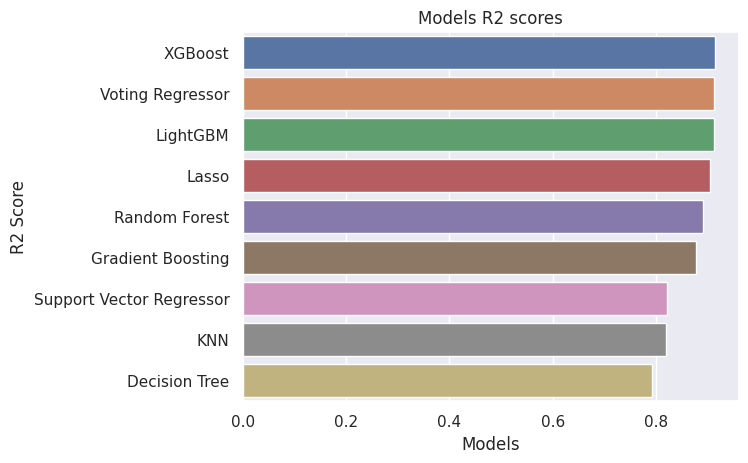

In [ ]:
# Create Bar plot for models according to R2.
df_summary = df_summary.sort_values(by='R2 Score', ascending=False)
sns.barplot(y = df_summary['Model Name'],x = df_summary['R2 Score'] ,data= df_summary, orient = 'h')
plt.title(f"Models R2 scores")
plt.xlabel('Models')
plt.ylabel("R2 Score")
plt.show()

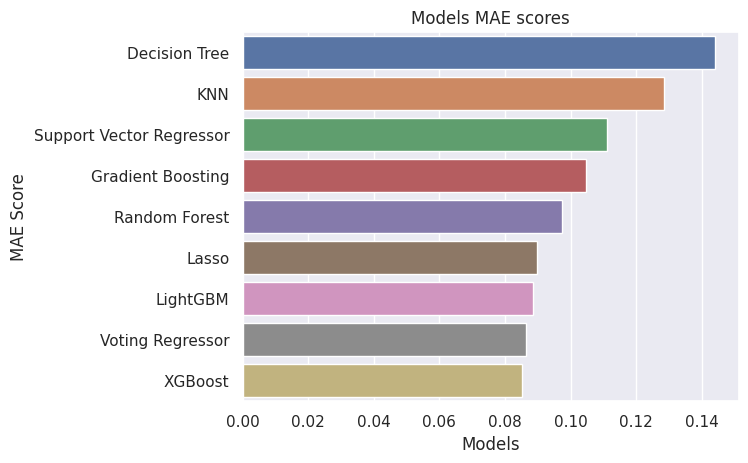

In [ ]:
# Create Bar plot for models according to MAE.
df_summary = df_summary.sort_values(by='MAE Score', ascending=False)
sns.barplot(y = df_summary['Model Name'],x = df_summary['MAE Score'] ,data= df_summary, orient = 'h')
plt.title(f"Models MAE scores")
plt.xlabel('Models')
plt.ylabel("MAE Score")
plt.show()

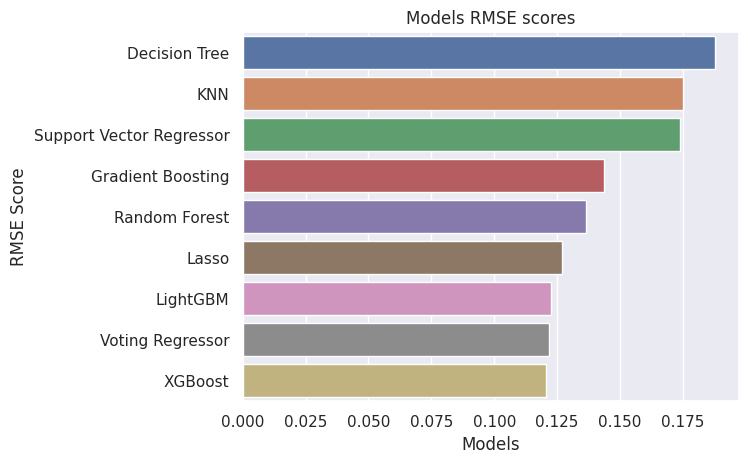

In [ ]:
# Create Bar plot for models according to RMSE.
df_summary = df_summary.sort_values(by='RMSE Score', ascending=False)
sns.barplot(y = df_summary['Model Name'],x = df_summary['RMSE Score'] ,data= df_summary, orient = 'h')
plt.title(f"Models RMSE scores")
plt.xlabel('Models')
plt.ylabel("RMSE Score")
plt.show()

In [ ]:
#XGBoost Feature importance
for score, name in zip(xgb_model.feature_importances_,X_train_scaled):
  print(round(score,2),name)

0.0 MSSubClass
0.01 MSZoning
0.0 LotFrontage
0.0 LotArea
0.0 Street
0.0 Alley
0.0 LotShape
0.01 LandContour
0.0 Utilities
0.0 LotConfig
0.0 LandSlope
0.0 Neighborhood
0.0 Condition1
0.0 Condition2
0.0 BldgType
0.0 HouseStyle
0.33 OverallQual
0.01 OverallCond
0.03 YearBuilt
0.01 YearRemodAdd
0.0 RoofStyle
0.0 RoofMatl
0.0 Exterior1st
0.0 Exterior2nd
0.0 MasVnrType
0.0 MasVnrArea
0.14 ExterQual
0.0 ExterCond
0.0 Foundation
0.01 BsmtQual
0.0 BsmtCond
0.0 BsmtExposure
0.0 BsmtFinType1
0.01 BsmtFinSF1
0.0 BsmtFinType2
0.0 BsmtFinSF2
0.0 BsmtUnfSF
0.02 TotalBsmtSF
0.0 Heating
0.0 HeatingQC
0.03 CentralAir
0.0 Electrical
0.01 1stFlrSF
0.01 2ndFlrSF
0.0 LowQualFinSF
0.05 GrLivArea
0.0 BsmtFullBath
0.0 BsmtHalfBath
0.02 FullBath
0.01 HalfBath
0.0 BedroomAbvGr
0.0 KitchenAbvGr
0.05 KitchenQual
0.0 TotRmsAbvGrd
0.0 Functional
0.03 Fireplaces
0.0 FireplaceQu
0.02 GarageType
0.0 GarageYrBlt
0.01 GarageFinish
0.11 GarageCars
0.01 GarageArea
0.01 GarageQual
0.02 GarageCond
0.0 PavedDrive
0.0 WoodDeck